In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
qol_data = pd.read_csv("D:/qol_beat.csv")
crime_data = pd.read_csv("D:/crime_beat.csv")

crime_data = crime_data[crime_data.Zip == 70119]
qol_data = qol_data[qol_data.zip_code == 70119]

In [366]:
crimeSub_5K02 = crime_data[crime_data.Beat == '5K02']
qolSub_5K02 = qol_data[qol_data.Beat == '5K02']
print(crimeSub_5K02.shape)
print(qolSub_5K02.shape)

(80, 27)
(395, 20)


In [3]:
crime_data.Description.value_counts()

ARMED ROBBERY WITH GUN            248
AGGRAVATED ASSAULT                110
AGGRAVATED RAPE                    93
SIMPLE ROBBERY                     89
AGGRAVATED BATTERY BY KNIFE        79
AGGRAVATED BATTERY BY SHOOTING     73
AGGRAVATED ASSAULT DOMESTIC        56
CARJACKING                         47
AGGRAVATED BATTERY                 41
HOMICIDE BY SHOOTING               37
AGGRAVATED CRIMINAL DAMAGE         34
SIMPLE RAPE                        25
ARMED ROBBERY WITH KNIFE           22
ARMED ROBBERY                      15
CARJACKING- NO WEAPON              12
AGGRAVATED RAPE MALE VICTIM         6
AGGRAVATED BATTERY DOMESTIC         6
HOMICIDE                            5
ORAL SEXUAL BATTERY                 2
HOMICIDE BY CUTTING                 1
Name: Description, dtype: int64

In [4]:
qol_data.issue_type.value_counts()

Trash/Garbage Pickup                   2165
Abandoned Vehicle Reporting/Removal    2081
Residential Recycling Programs         1936
Code Enforcement General Request       1487
Large Item Trash/Garbage Pickup        1464
Street Light                           1291
Illegal Dumping Reporting               584
Tree Service                            359
Pothole/Roadway Surface Repair          302
Street Flooding/Drainage                251
Tree Service Emergency                  206
Rodent Complaint                        196
Traffic Sign                            139
Catch Basin Maintenance                 129
Mosquito Control                        109
Dead Animal Pickup                      102
Traffic Signal                           92
Sidewalk Repair                          73
Subsidence                               59
Manhole Cover Maintenance                28
Grass Service                            24
Non Rodent Complaint                     24
Street Name Sign                

In [5]:
crime_data

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,CrimeType,Description,Date,latitude,longitude,Beat_New
3,A2136614,65.0,SIMPLE ROBBERY,1B,65.0,SIMPLE ROBBERY,1B,3668999,535899,01/17/2014 12:10:08 PM,...,040XX S Carrollton Ave,70119,1,"(29.96791191, -90.10739402)",VIOLENT CRIME,SIMPLE ROBBERY,2014-01-17,29.967912,-90.107394,1K02
4,A2697014,65.0,SIMPLE ROBBERY,1B,65.0,SIMPLE ROBBERY,1B,3674619,534666,01/21/2014 08:43:35 PM,...,Jane Pl & Palmyra St,70119,1,"(29.96435362, -90.08968824)",VIOLENT CRIME,SIMPLE ROBBERY,2014-01-21,29.964354,-90.089688,1L01
9,B0764814,65.0,SIMPLE ROBBERY,1B,NaN,AGGRAVATED BATTERY BY KNIFE,2B,3676890,533845,02/06/2014 11:16:44 PM,...,022XX Canal St,70119,1,"(29.96203002, -90.08254490)",VIOLENT CRIME,SIMPLE ROBBERY,2014-02-06,29.962030,-90.082545,1H02
10,B0846414,65.0,SIMPLE ROBBERY,1B,35.0,SIMPLE BATTERY,2A,3679878,537684,02/07/2014 03:25:06 PM,...,Esplanade Ave & N Galvez St,70119,1,"(29.97249635, -90.07297695)",VIOLENT CRIME,SIMPLE ROBBERY,2014-02-07,29.972496,-90.072977,1C01
12,B1115914,65.0,SIMPLE ROBBERY,1B,NaN,ARMED ROBBERY WITH KNIFE,1A,3682480,539810,02/09/2014 04:20:39 PM,...,N Galvez St & Allen St,70119,5,"(29.97826145, -90.06468399)",VIOLENT CRIME,SIMPLE ROBBERY,2014-02-09,29.978261,-90.064684,5K02
14,B1565314,65.0,SIMPLE ROBBERY,1B,35.0,SIMPLE BATTERY,1D,3683861,541329,02/13/2014 07:15:00 AM,...,024XX Touro St,70119,5,"(29.98239717, -90.06027066)",VIOLENT CRIME,SIMPLE ROBBERY,2014-02-13,29.982397,-90.060271,5K01
18,B3275714,65.0,SIMPLE ROBBERY,1B,35.0,SIMPLE BATTERY,1D,3676138,534220,02/25/2014 08:46:00 PM,...,024XX Canal St,70119,1,"(29.96308271, -90.08490758)",VIOLENT CRIME,SIMPLE ROBBERY,2014-02-25,29.963083,-90.084908,1H02
19,B3637514,65.0,SIMPLE ROBBERY,2A,NaN,"SIMPLE ROBBERY, PROPERTY SNATCHING",2B,3669759,536878,02/28/2014 03:12:51 PM,...,S Carrollton Ave & D'Hemecourt St,70119,3,"(29.97058085, -90.10496089)",VIOLENT CRIME,SIMPLE ROBBERY,2014-02-28,29.970581,-90.104961,3D02
20,C0013214,65.0,SIMPLE ROBBERY,1B,21.0,COMPLAINT OTHER,2A,3678585,541090,03/01/2014 01:57:27 AM,...,016XX Gentilly Blvd,70119,1,"(29.98189927, -90.07694328)",VIOLENT CRIME,SIMPLE ROBBERY,2014-03-01,29.981899,-90.076943,1C03
21,C0165714,65.0,SIMPLE ROBBERY,1B,NaN,CARJACKING,2A,3673882,534642,03/01/2014 11:33:35 PM,...,004XX S Dupre St,70119,1,"(29.96431016, -90.09201686)",VIOLENT CRIME,SIMPLE ROBBERY,2014-03-01,29.964310,-90.092017,1L01


In [4]:
print(crime_data.shape)
print(qol_data.shape)

(1001, 27)
(13166, 20)


In [6]:
def getDate(data, dateCol, colUsed):
    newDf = data.copy()
    date = pd.to_datetime(data[dateCol])     
    # newDf['Year'] = date.dt.year
    # newDf['Month'] = date.dt.month
    # newDf['Day'] = date.dt.day
    # newDf['Date'] = pd.to_datetime(newDf['Year']*10000 + newDf['Month']*100 + newDf['Day'], format='%Y%m%d')
    # totalCols = colUsed + ['Date', 'Year', 'Month', 'Day']
    year = date.dt.year
    month = date.dt.month
    day = date.dt.day
    newDf['Date'] = pd.to_datetime(year*10000 + month*100 + day, format='%Y%m%d')
    totalCols = colUsed + ['Date']
    newDf = newDf[totalCols]
    return newDf

In [368]:
# newCrime_data = getDate(crime_data, 'TimeCreate', ['Beat'])
# newQol_data = getDate(qol_data, 'ticket_created_date_time', ['issue_type', 'Beat'])

newCrime_data = getDate(crimeSub_5K02, 'TimeCreate', ['Beat'])
newQol_data = getDate(qolSub_5K02, 'ticket_created_date_time', ['issue_type', 'Beat'])

In [369]:
def getIssueWithinTimeWin(data, dataCol, statDate, endDate, issueCol = None, issueName = None):
    # select by date
    newData = data[(data[dataCol] >= statDate) & (data[dataCol] <= endDate)]
    
    if issueCol == None and issueName == None: 
        newData.index = list(range(newData.shape[0]))
        return newData
    else:
        newData = newData[data[issueCol] == issueName]
        newData.index = list(range(newData.shape[0]))
        return newData    

In [371]:
# see the whole year trend
crime_2016 = getIssueWithinTimeWin(newCrime_data, 'Date', dt.datetime(2016, 1, 1), dt.datetime(2016, 12, 31))
qol_2016_vehicle = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 1, 1), dt.datetime(2016, 12, 31),
                                           'issue_type', 'Abandoned Vehicle Reporting/Removal')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [104]:
# get all beats
all_beats = list(set(list(qol_2016_vehicle.Beat.values) + list(crime_2016.Beat.values)))
# print(len(qol_data.Beat.value_counts()))
# print(len(crime_data.Beat.value_counts()))
print(len(all_beats))
print(all_beats)

47
['3D01', '1N01', '3H01', '1N02', '1C02', '1L03', '1G02', '1K02', '3X03', '1M04', '3L03', '1I02', '5K03', '1C03', '1K01', '1G01', '1J02', '3I01', '1J04', '1L01', '1I04', '1M01', '1J01', '3A02', '5K04', '1J03', '5K01', '1I03', '1H02', '1N03', '3I06', '3L02', '1B01', '5K02', '1C01', '3D02', '1I01', '3H02', '1L04', '3L01', '5A02', '1M03', '1L02', '1M05', '3L04', '1C04', '1M02']


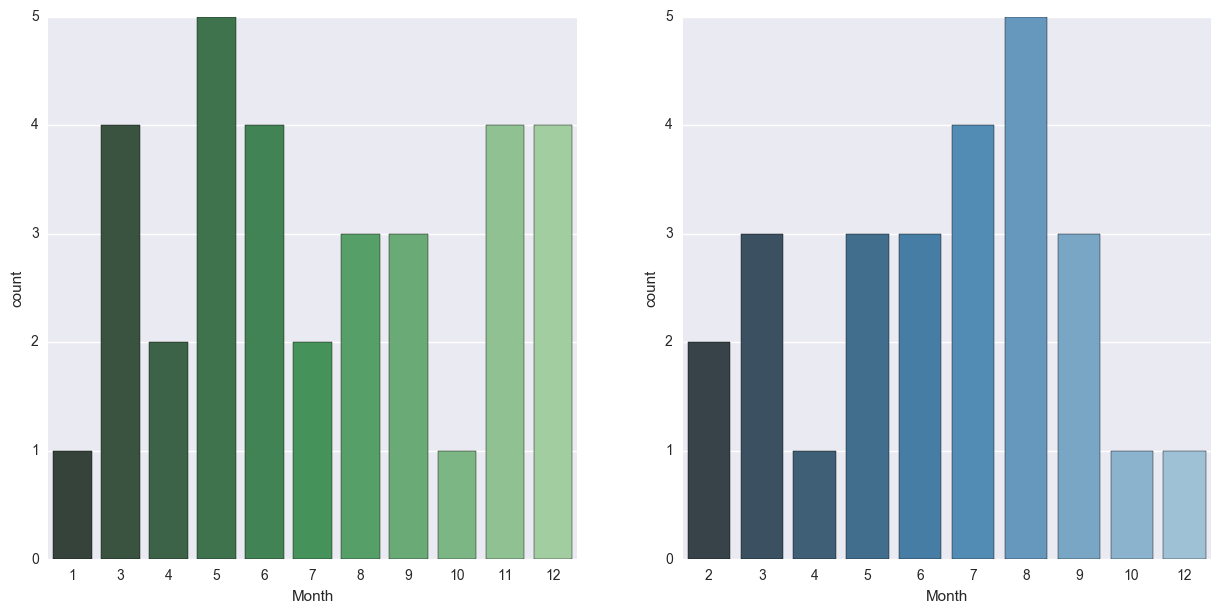

In [372]:
crime_tb = pd.DataFrame({'Month': crime_2016.Date.dt.month,
                         'Count': np.repeat(1, len(crime_2016.Date))
                        }, index = None)

qol_tb = pd.DataFrame({'Month': qol_2016_vehicle.Date.dt.month,
                       'Count': np.repeat(1, len(qol_2016_vehicle.Date))
                      }, index = None)

fig = plt.figure(dpi = 80, figsize = (15, 7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot = sns.countplot(x = "Month", data = crime_tb, palette = "Greens_d")

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot = sns.countplot(x = "Month", data = qol_tb, palette = "Blues_d")

In [340]:
crime_201605 = getIssueWithinTimeWin(newCrime_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31))
qol_201605_vehicle = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 11, 30),
                                           'issue_type', 'Abandoned Vehicle Reporting/Removal')
qol_201605_light = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 11, 1), dt.datetime(2016, 11, 30),
                                           'issue_type', 'Street Light')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [266]:
crime_201605 = getIssueWithinTimeWin(newCrime_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31))
qol_201605_trash = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Trash/Garbage Pickup')
qol_201605_vehicle = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Abandoned Vehicle Reporting/Removal')
qol_201605_recycling = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Residential Recycling Programs')
qol_201605_ltrash = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Large Item Trash/Garbage Pickup')
qol_201605_light = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Street Light')
qol_201605_dumping = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Illegal Dumping Reporting')
qol_201605_streetRep = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Pothole/Roadway Surface Repair ')
qol_201605_streetFld = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Street Flooding/Drainage')
qol_201605_rodent = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Rodent')
qol_201605_sign = getIssueWithinTimeWin(newQol_data, 'Date', dt.datetime(2016, 5, 1), dt.datetime(2016, 5, 31),
                                           'issue_type', 'Traffic Sign')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [341]:
print(crime_201605.shape, qol_201605_trash.shape)
print(crime_201605.shape, qol_201605_vehicle.shape)
print(crime_201605.shape, qol_201605_recycling.shape)
print(crime_201605.shape, qol_201605_ltrash.shape)
print(crime_201605.shape, qol_201605_light.shape)
print(crime_201605.shape, qol_201605_dumping.shape)

(39, 2) (85, 3)
(39, 2) (52, 3)
(39, 2) (55, 3)
(39, 2) (61, 3)
(39, 2) (13, 3)
(39, 2) (23, 3)


In [295]:
currComb = []
for i in range(crime_201605.shape[0]):
    currComb.append((crime_201605.Beat.iloc[i], str(crime_201605.Date.iloc[i])))

print(currComb)

[('5K02', '2016-11-02 00:00:00'), ('1C04', '2016-11-08 00:00:00'), ('1C01', '2016-11-13 00:00:00'), ('1L02', '2016-11-14 00:00:00'), ('1N01', '2016-11-17 00:00:00'), ('1K01', '2016-11-18 00:00:00'), ('1C01', '2016-11-26 00:00:00'), ('5K02', '2016-11-26 00:00:00'), ('5A02', '2016-11-27 00:00:00'), ('1M03', '2016-11-27 00:00:00'), ('1C01', '2016-11-29 00:00:00'), ('5K02', '2016-11-30 00:00:00'), ('3H01', '2016-11-05 00:00:00'), ('1M05', '2016-11-18 00:00:00'), ('3X03', '2016-11-27 00:00:00'), ('1L04', '2016-11-29 00:00:00'), ('1L01', '2016-11-02 00:00:00'), ('3X03', '2016-11-06 00:00:00'), ('1L02', '2016-11-21 00:00:00'), ('1N03', '2016-11-28 00:00:00'), ('1N03', '2016-11-28 00:00:00'), ('1G02', '2016-11-15 00:00:00'), ('1J04', '2016-11-18 00:00:00'), ('1C02', '2016-11-18 00:00:00'), ('1K02', '2016-11-20 00:00:00'), ('1I01', '2016-11-27 00:00:00'), ('1C03', '2016-11-03 00:00:00'), ('1N02', '2016-11-04 00:00:00'), ('5K01', '2016-11-07 00:00:00'), ('5K04', '2016-11-05 00:00:00'), ('1J03', 

In [296]:
def getAllBeatsDatesComb(beats, startYear, startMonth, startDay, endYear, endMonth, endDay):
    
    comb = []
    
    for beat in beats:
        for year in range(int(startYear), int(endYear) + 1, 1):
            for month in range(int(startMonth), int(endMonth) + 1, 1):
                if month < 10: month = '0' + str(month)
                else: month = str(month)
                
                for day in range(int(startDay), int(endDay) + 1, 1):    
                    if day < 10: day = '0' + str(day)
                    else: day = str(day)
                
                    date = str(year) + '-' + month + '-' + day + ' 00:00:00'
                    comb.append((beat, date))
    
    return comb                

In [303]:
allPossComb = getAllBeatsDatesComb(all_beats, '2016', '11', '01', '2016', '11', '30')
print(len(allPossComb))

1410


In [304]:
def getCountTable(possComb, reallComb):
    
    dates = []
    beats = []
    counts = []
    
    for ele in possComb:
        beats.append(ele[0])
        dates.append(ele[1])
        
        if ele in reallComb:
            counts.append(reallComb.count(ele))
        else:
            counts.append(reallComb.count(0))
     
    comb_table = pd.DataFrame({'Beat': beats,
                               'Date': pd.to_datetime(dates),
                               'Number_Of_Crime': counts
                              }, index = None)
    
    return comb_table

In [305]:
crime_stat = getCountTable(allPossComb, currComb)
print(crime_stat.shape)
print(crime_stat.Number_Of_Crime.value_counts())

(1410, 3)
0    1373
1      35
2       2
Name: Number_Of_Crime, dtype: int64


In [306]:
def getDaysBetweenQolAndCrime(qolData, crimeData):
    daysBetween = []
    copyTimes = qolData.shape[0]
    df = pd.DataFrame(pd.np.tile(crimeData, (copyTimes, 1)))
    df.columns = crimeData.columns
    
    for i in range(qolData.shape[0]):
        for j in range(crimeData.shape[0]):
            duration = (crimeData['Date'].iloc[j] - qolData['Date'].iloc[i]).days
            daysBetween.append(duration)

    df['DaysBetween'] = daysBetween
    return df   

In [307]:
regData_trash = getDaysBetweenQolAndCrime(qol_201605_trash, crime_stat)
print(regData_trash.shape)

KeyboardInterrupt: 

In [308]:
regData_vehicle = getDaysBetweenQolAndCrime(qol_201605_vehicle, crime_stat)
print(regData_vehicle.shape)

(73320, 4)


In [229]:
regData_recycling = getDaysBetweenQolAndCrime(qol_201605_recycling, crime_stat)
print(regData_recycling.shape)

(80135, 4)


In [249]:
regData_ltrash = getDaysBetweenQolAndCrime(qol_201605_ltrash, crime_stat)
print(regData_ltrash.shape)

(88877, 4)


In [342]:
regData_light = getDaysBetweenQolAndCrime(qol_201605_light, crime_stat)
print(regData_light.shape)

(18330, 4)


In [239]:
regData_dumping = getDaysBetweenQolAndCrime(qol_201605_dumping, crime_stat)
print(regData_dumping.shape)

(33511, 4)


In [267]:
regData_streetRep = getDaysBetweenQolAndCrime(qol_201605_streetRep, crime_stat)
print(regData_streetRep.shape)

(0, 4)


In [268]:
regData_streetFld = getDaysBetweenQolAndCrime(qol_201605_streetFld, crime_stat)
print(regData_streetFld.shape)

(1457, 4)


In [269]:
regData_rodent = getDaysBetweenQolAndCrime(qol_201605_rodent, crime_stat)
print(regData_rodent.shape)

(0, 4)


In [270]:
regData_sign = getDaysBetweenQolAndCrime(qol_201605_sign, crime_stat)
print(regData_sign.shape)

(2914, 4)


In [220]:
def getDummaries(data, windows):
    
    df = data.copy()
    for i in range(len(windows)):
        if windows[i] > 0: name = 'DummyPos' + str(windows[i])
        elif windows[i] < 0: name = 'DummyNeg' + str(-windows[i])
        else: name = 'Dummy0'
            
        if i == 0:
            df[name] = np.where(df['DaysBetween'] <= windows[i], 1, 0)
        elif i == len(windows) - 1:
            df[name] = np.where(df['DaysBetween'] >= windows[i], 1, 0)
        else:
            df[name] = np.where(df['DaysBetween'] == windows[i], 1, 0)
            
    return df

In [355]:
# windows = [-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 
#            0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
windows = list(range(-23, 24)) 
# windows= list(range(-50, 55, 5)) 
regDummyData = getDummaries(regData_light, windows)
regD2 = regDummyData.copy()

In [356]:
regDummyData.head(5)

,Beat,Date,Number_Of_Crime,DaysBetween,DummyNeg23,DummyNeg22,DummyNeg21,DummyNeg20,DummyNeg19,DummyNeg18,...,DummyPos14,DummyPos15,DummyPos16,DummyPos17,DummyPos18,DummyPos19,DummyPos20,DummyPos21,DummyPos22,DummyPos23
0,3D01,2016-11-01 00:00:00,0,-6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3D01,2016-11-02 00:00:00,0,-5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3D01,2016-11-03 00:00:00,0,-4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3D01,2016-11-04 00:00:00,0,-3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3D01,2016-11-05 00:00:00,0,-2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
print(min(regDummyData.Date))
dummy = regDummyData[['Beat', 'Date']]
dummyVar = pd.get_dummies(dummy)
final_table = pd.concat([regDummyData.drop(regDummyData[['DummyNeg1', 'Beat', 'DaysBetween', 'Date']], axis=1), 
                         dummyVar], axis = 1)
final_table = final_table.drop(final_table[['Beat_' + regDummyData.Beat.iloc[0], 
                                            'Date_' + str(min(regDummyData.Date))]], axis = 1)

2016-11-01 00:00:00


In [363]:
final_table.to_csv("201611_light_crime_eventStudy.csv")
print(final_table.shape)
print(final_table.isnull().sum().sum())
final_table.head()

(18330, 122)
0


,Number_Of_Crime,DummyNeg23,DummyNeg22,DummyNeg21,DummyNeg20,DummyNeg19,DummyNeg18,DummyNeg17,DummyNeg16,DummyNeg15,...,Date_2016-11-21 00:00:00,Date_2016-11-22 00:00:00,Date_2016-11-23 00:00:00,Date_2016-11-24 00:00:00,Date_2016-11-25 00:00:00,Date_2016-11-26 00:00:00,Date_2016-11-27 00:00:00,Date_2016-11-28 00:00:00,Date_2016-11-29 00:00:00,Date_2016-11-30 00:00:00
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
# make plot
regD3 = regD2.drop(regD2[['Beat', 'DaysBetween', 'Date']], axis=1)
regD3.shape

(18330, 48)

In [360]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h, h


def makePlot(dummyWindVars, windows):
    meanList = []
    upperList = []
    lowerList = []
    ciList = []
    
    var = dummyWindVars.columns
    length = int((len(var) - 1) / 2)
    # rank = list(range(-length, 0)) + [0] + list(range(1, length + 1))
    rank = windows
    reference = np.mean(np.log((dummyWindVars.Number_Of_Crime[dummyWindVars['DummyNeg1'] == 1] + 1).astype(float)))
    
    for i in range(len(var)):
        colName = var[i]
        if colName == 'DummyNeg1': 
            mean, lower, upper, ci = 0, 0, 0, 0
            meanList.append(mean)
            upperList.append(upper)
            lowerList.append(lower)
            ciList.append(ci)
        
        else:
            if colName != 'Number_Of_Crime':
                values = np.log((dummyWindVars.Number_Of_Crime[dummyWindVars[colName] == 1] + 1).astype(float)) - reference
                # print(values)
                mean, lower, upper, ci = mean_confidence_interval(values)

                meanList.append(mean)
                upperList.append(upper)
                lowerList.append(lower)
                ciList.append(ci)
    print(len(rank))
    print(len(meanList))
    print(len(upperList))
    print(len(lowerList))
    print(len(ciList))
        
    res = pd.DataFrame({'Time': rank,
                        'Mean': meanList,
                        'Upper_bound': upperList,
                        'Lower_bound': lowerList,
                        'Cofidence_Interval': ciList
                       }, index = None)
    return res

In [361]:
plot_tb = makePlot(regD3, windows)
# plot_tb = plot_tb.iloc[1:(plot_tb.shape[0] - 1), :]
plot_tb

47
47
47
47
47


,Cofidence_Interval,Lower_bound,Mean,Time,Upper_bound
0,0.011391,-0.005987,0.005405,-23,0.016796
1,0.020597,-0.026462,-0.005865,-22,0.014732
2,0.014430,-0.020295,-0.005865,-21,0.008565
3,0.016329,-0.018743,-0.002414,-20,0.013915
4,0.013561,-0.020650,-0.007089,-19,0.006472
5,0.010022,-0.021786,-0.011764,-18,-0.001742
6,0.012882,-0.018747,-0.005865,-17,0.007017
7,0.018019,-0.009137,0.008883,-16,0.026902
8,0.015176,-0.015142,0.000034,-15,0.015210
9,0.011746,-0.017611,-0.005865,-14,0.005881


(-0.04, 0.06)

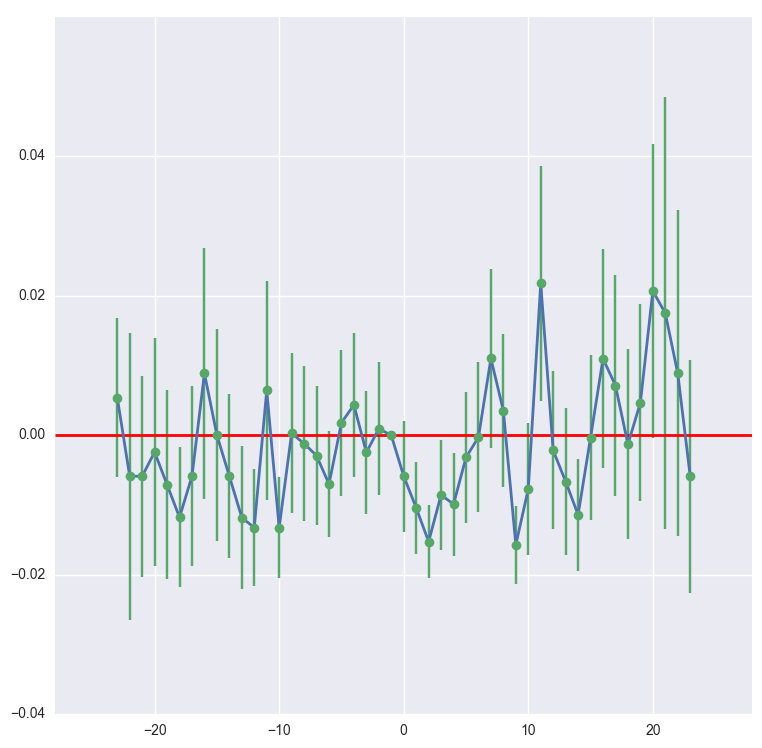

In [362]:
plt.figure(figsize=(9,9))

plt.plot(plot_tb.Time, plot_tb.Mean, lw=2)

plt.errorbar(x = plot_tb.Time, 
             y = plot_tb.Mean, 
             yerr = plot_tb.Cofidence_Interval,
             fmt='o')

plt.hlines(xmin = -28, xmax = 28,
           y = 0, 
           linewidth = 2.0,
           color = "red")

plt.xlim(-28, 28)
plt.ylim(-0.04, 0.06)